In [3]:
%matplotlib inline

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 27 17:35:37 2017

@author: alan barzilay
"""

#import numpy
import matplotlib.pyplot as plt
import random
#import matplotlib.animation as animation
import statistics

#import matplotlib.lines as mlines   # para por legendas (?)
 

def genetic_drift(N, p0, G):
    
    #G = 100  #colocar ocmo input da funcao?  #numero de geracoes q vamos deixar a simulacao correr
    i=0
    pop_atual = []
    geracoes = []
    frequencias = []

    
    
    
    while (i<2*N): # da pra melhorar isso facil #criar lista de tamanho 2N com proporcao certa de alelos
    
        if (i <2*N*p0):
            pop_atual.append(1) #alelo de frequencia p0
        else:
            pop_atual.append(0)  #outro alelo
            
        i+=1
        
   
        
   #random.shuffle(pop_atual) # mistura populacao (n sei se precisa, to achando q nao)
    
    
    
    
    geracoes.append( pop_atual)  # faz as seguintes iteracoes para cada geracao
    i=1
    while (i<= G):
     
        geracoes.append( random.choices( geracoes[i-1] , k = 2*N))
        #seleciona elementos de maneira aleatoria da geracao passada ate terminar de compor a nova geracao, assim cada geracao eh salva e feita a partir da anterior       
        i+=1

    i=1
    frequencias.append( p0)
    while (i < len(geracoes)): 
      
        p_i = 0
        j=0
        while(j  < 2*N):
        
            p_i += geracoes[i][j]
            j+=1
            
        p_i = p_i/(2*N) #numero de alelos A1 dividido pelo numero total de alelos
        frequencias.append( p_i )
        i+=1
  
        
        
  
    return frequencias

def heterozigose(frequencias):
    #dado uma lista de frequencias, gera uma lista com a heterozigose de cada frequencia
    heterozigose = []
    i=0
    while (i < len(frequencias)):
        heterozigose.append(  2 * frequencias[i] *( 1 - frequencias[i] ))
        
        i+=1
    return heterozigose





def variancia_freq(N, p0, G, iteracoes):
    lista_frequencias = []
    freq_na_geracao = []  #de uso temporario, armazena todos as frequencias para uma mesma geracao numa lista
    variancia = []
    

    i = 0
    while ( i < iteracoes): 
        lista_frequencias.append(genetic_drift(N, p0, G))
        i+=1
        
    i=0
    while(i< G):
        j=0
        freq_na_geracao = [] #limpa lista
        
        while (j < iteracoes):
            freq_na_geracao.append(lista_frequencias[j][i]) #faz lista iiiiiiiiiiii
            j+=1
        
        variancia.append( statistics.pvariance(freq_na_geracao) )  #adiciona numa lista a variancia de cada geracao          
        i+=1
    
    return variancia

def variancia_hetero(N, p0, G, iteracoes):
    lista_frequencias = []
    freq_na_geracao = []  #de uso temporario, armazena todos as frequencias para uma mesma geracao numa lista
    variancia = []
    

    i = 0
    while ( i < iteracoes): 
        lista_frequencias.append(genetic_drift(N, p0, G))
        i+=1
        
    i=0
    while(i< G):
        j=0
        freq_na_geracao = [] #limpa lista
        
        while (j < iteracoes):
            freq_na_geracao.append(2 * lista_frequencias[j][i] * (1-lista_frequencias[j][i] ) ) #faz lista iiiiiiiiiiii
            j+=1
        
        variancia.append( statistics.pvariance(freq_na_geracao) )  #adiciona numa lista a variancia de cada geracao          
        i+=1
    
    return variancia

        
def media_freq(N, p0, G, iteracoes):
    lista_frequencias = []
    freq_na_geracao = []  #de uso temporario, armazena todos as frequencias para uma mesma geracao numa lista
    media = []
    

    i = 0
    while ( i < iteracoes): 
        lista_frequencias.append(genetic_drift(N, p0, G))
        i+=1
        
    i=0
    while(i< G):
        j=0
        freq_na_geracao = [] #limpa lista
        
        while (j < iteracoes):
            freq_na_geracao.append(lista_frequencias[j][i]) #faz lista iiiiiiiiiiii
            j+=1
        
        media.append( statistics.mean(freq_na_geracao) )  #adiciona numa lista a variancia de cada geracao          
        i+=1
    
    return media
        
        
def media_hetero(N, p0, G, iteracoes):
    lista_frequencias = []
    freq_na_geracao = []  #de uso temporario, armazena todos as frequencias para uma mesma geracao numa lista
    media = []
    

    i = 0
    while ( i < iteracoes): 
        lista_frequencias.append(genetic_drift(N, p0, G))
        i+=1
        
    i=0
    while(i< G):
        j=0
        freq_na_geracao = [] #limpa lista
        
        while (j < iteracoes):
            freq_na_geracao.append( 2 * lista_frequencias[j][i] * (1- lista_frequencias[j][i]) ) #faz lista iiiiiiiiiiii
            j+=1
        
        media.append( statistics.mean(freq_na_geracao) )  #adiciona numa lista a variancia de cada geracao          
        i+=1
    
    return media
        
def hetero_teorico(N,p0,G):
    
    heterozigose = []
    heterozigose.append(2 * p0 * (1-p0 ))
    
    i=1
    while (i < G):
        heterozigose.append( heterozigose[0] * (1 - (1/2*N))**i   )
        print(heterozigose[0] * (1 - (1/(2*N) ) )**i  )
        i+=1
    print (heterozigose[0])
    return heterozigose
    
    

    
    
    
teste = genetic_drift(20, 0.2, 100) 
teste_variancia = variancia_freq(20, 0.2 , 500, 100  )

teste2 = media_freq(20,0.2,500,100)
teste3 = variancia_hetero(20,0.2,500,100)
teste4 = media_hetero(20,0.2,500, 100)

teste5 = hetero_teorico(20,0.2,100)


#plt.plot( range(len(teste)) , teste, label = "Frequencia(t)")
#plt.plot( range(len(teste)) , heterozigose(teste), label = "Heterozigose(t)")
plt.plot( range(len(teste_variancia)) , teste_variancia, label = "Variancia da frequencia")

plt.plot( range(len(teste2)) , teste2, label = "Média da frequencia")
plt.plot( range(len(teste3)) , teste3, label = "Variancia da heterozigose")
plt.plot( range(len(teste4)) , teste4, label = "Média da heterozigose")
#plt.plot( range(len(teste5)) , teste5, label = "Heterozigose teorica")


plt.xlim( [0, 500])#definir limites do grafico
plt.ylim([0,1])#definir limites do grafico
plt.legend()#handles=[red_line, blue_line]) #definir legenda
plt.xlabel("Gerações")
plt.ylabel("p")
#plt.title("TITULO")   #ponho titulo?


#outro jeito de fazer legenda:
#red_line = mlines.Line2D([], [], color='red', markersize=15, label="[B]")
#blue_line = mlines.Line2D([], [], color='blue', markersize=15, label="[A]")


#
#fig1 = plt.figure()
#
#teste_gif = animation.FuncAnimation(fig1, genetic_drift, 25,fargs = (20 , 0.2) , interval=50)    
#    
plt.show


In [15]:

def faz_tudo(N):


    teste_variancia = variancia_freq(N, 0.2 , 100, 100  )

    teste2 = media_freq(N,0.2,100,100)
    teste3 = variancia_hetero(N,0.2,100,100)
    teste4 = media_hetero(N,0.2,100, 100)






    plt.plot( range(len(teste_variancia)) , teste_variancia, label = "Variancia da frequencia")

    plt.plot( range(len(teste2)) , teste2, label = "Média da frequencia")
    plt.plot( range(len(teste3)) , teste3, label = "Variancia da heterozigose")
    plt.plot( range(len(teste4)) , teste4, label = "Média da heterozigose")
    return


def algumas_derivas(N):
    i=0
    while (i <6):
        teste = genetic_drift(N, 0.2, 100) 
        plt.plot( range(len(teste)) , teste, label = "Frequencia(t)")
        i+=1



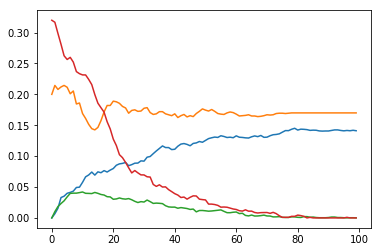

In [10]:
faz_tudo(10)

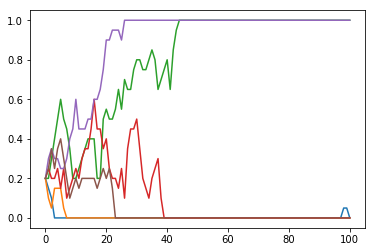

In [19]:
algumas_derivas(10)

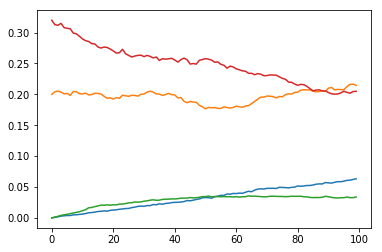

In [20]:
faz_tudo(100)

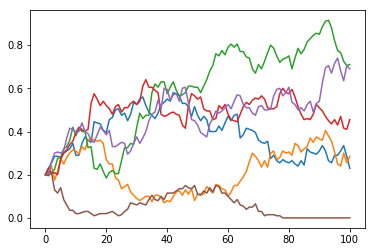

In [27]:
algumas_derivas(100)

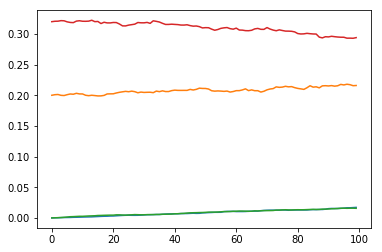

In [28]:
faz_tudo(500)

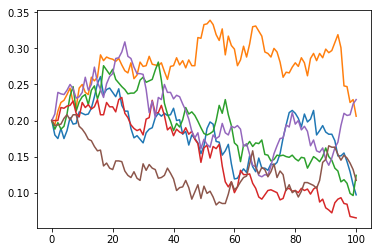

In [31]:
algumas_derivas(500)